# Computation of shape contour and area during growth of propagules.


##  Documentation and Imports


Created on 27-05-2021

Author: Valentin Laplaud

This code aims to compute the shape of propagules growing in microfluidic chips. It detects gemmae contours using binarization, and saves the data of the contour position on the image, as well as the area and geometrical center position of each gemmae. 

A second part fits the evolution of gemmae in time with a delayed exponential.

In [1]:
## Clean up before script start 

for element in dir():

    if element[0:1] != "_":

        del globals()[element]

import gc
gc.collect()

# plotting stuff in jupyter
import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline

COLOR = 'black'
COLOR2 = 'white'

mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR

mpl.rcParams["figure.facecolor"] = COLOR2
mpl.rcParams["axes.facecolor"] = COLOR2
mpl.rcParams["savefig.facecolor"] = COLOR2
mpl.rcParams['axes.facecolor'] = COLOR2


# to hide known warnings
import warnings
warnings.filterwarnings("ignore")

# my functions
import sys
sys.path.append(r'd:\Users\laplaud\Desktop\PostDoc\Code\PythonFunctions/')
import VallapFunc as vf
from Main import BinarizeAndFitArea, BinarizeAndFitOsChoc
from GemmaeDetection import FindChipPos
import numpy as np
import pandas as pd

## Fetch data details

In [2]:
%run d:\Users\laplaud\Desktop\PostDoc\Code\PythonFunctions/ExperimentList.py

Data choice made.


## Run analysis

### 03/27-09-2021 : Flux controls V5 

In [5]:
# BinarizeAndFitArea('210903_1mlh',StackList210903_1,P210903_1,Scale210903,FPH210903,Delay210903,0.98,'V^','F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('210903_500ulh',StackList210903_5,P210903_5,Scale210903,FPH210903,Delay210903,0.98,'Vv','F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])


# BinarizeAndFitArea('210927_1mlh',StackList210927_1,P210927_1,Scale210927,FPH210927,Delay210927,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('210927_500ulh',StackList210927_5,P210927_5,Scale210927,FPH210927,Delay210927,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])

### System control DV6 (22-10-2021)

In [6]:
# BinarizeAndFitArea('211022_Ct1',StackList211022_Ct1,P211022_Ct1,Scale211022,FPH211022,Delay211022,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('211022_Ct2',StackList211022_Ct2,P211022_Ct2,Scale211022,FPH211022,Delay211022,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])

### Degas & BSA controls DV6 (05-11-2021, 22-12-2021)

In [7]:
# BinarizeAndFitArea('211105_Deg_Bsa',StackList211105_Deg_Bsa,P211105_Deg_Bsa,Scale211105,FPH211105,Delay211105,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(30, 20, 70),(60, 120,220)])

# BinarizeAndFitArea('211105_Degas',StackList211105_Degas,P211105_Degas,Scale211105,FPH211105,Delay211105,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(30, 20, 70),(60, 120,220)])



# BinarizeAndFitArea('211222_Deg_Bsa',StackList211222_Deg_Bsa,P211222_Deg_Bsa,Scale211222,FPH211222,Delay211222,0.98,'H<','F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('211222_Degas',StackList211222_Degas,P211222_Degas,Scale211222,FPH211222,Delay211222,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])


### Stade comparison DV6 (07/12/14-01-2022)

In [8]:
# BinarizeAndFitArea('220107_S1',StackList220107_S1,P220107_S1,Scale220107,FPH220107,Delay220107,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(25, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('220107_S3',StackList220107_S3,P220107_S3,Scale220107,FPH220107,Delay220107,0.98,'H<','F',
#                    debug = False, debugAll = False, HSVrange =[(25, 30, 70),(60, 120,220)])


# BinarizeAndFitArea('220112_S1',StackList220112_S1,P220112_S1,Scale220112,FPH220112,Delay220112,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(20, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('220112_S3',StackList220112_S3,P220112_S3,Scale220112,FPH220112,Delay220112,0.98,'H<','F',
#                    debug = False, debugAll = False, HSVrange =[(20, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('220114_S1',StackList220114_S1,P220114_S1,Scale220114,FPH220114,Delay220114,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(25, 25, 70),(60, 120,220)])

# BinarizeAndFitArea('220114_S3',StackList220114_S3,P220114_S3,Scale220114,FPH220114,Delay220114,0.98,'H<','F',
#                    debug = False, debugAll = False, HSVrange =[(25, 25, 70),(60, 120,220)])


### System controls with Stade1 & degas DV6 (24-01-2022,14-02-2022)

In [9]:
# BinarizeAndFitArea('220124_Ct1',StackList220124_Ct1,P220124_Ct1,Scale220124,FPH220124,Delay220124,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(15, 17, 60),(70, 140,220)])

# BinarizeAndFitArea('220124_Ct2',StackList220124_Ct2,P220124_Ct2,Scale220124,FPH220124,Delay220124,0.98,'H<','F',
#                    debug = False, debugAll = False, HSVrange =[(15, 17, 60),(70, 140,220)])

# BinarizeAndFitArea('220214_Ct1',StackList220214_Ct1,P220214_Ct1,Scale220214,FPH220214,Delay220214,0.98,'H<','F',
#                    debug = False, debugAll = False, debuglist = [0],HSVrange =[(15, 17, 60),(70, 140,220)])

# BinarizeAndFitArea('220214_Ct2',StackList220214_Ct2,P220214_Ct2,Scale220214,FPH220214,Delay220214,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(15, 17, 60),(70, 140,220)])


### Osmotic choc after 14-02-2022 

In [10]:
# BinarizeAndFitOsChoc('220214_Ct1_Osmo',StackList220214_Ct1_Osmo,P220214_Ct1_Osmo,Scale220214_Osmo,FPH220214_Osmo,0.95,'H<','F',
#                    showHist = True, debug = False, HSVrange =[(15, 30, 60),(70, 140,220)],FitIntervalComp = [0,25],
#                      FitIntervalRel = [23,60])

# BinarizeAndFitOsChoc('220214_Ct2_Osmo',StackList220214_Ct2_Osmo,P220214_Ct2_Osmo,Scale220214_Osmo,FPH220214_Osmo,0.95,'H>','F',
#                    showHist = True, debug = False, HSVrange =[(15, 30, 60),(70, 140,220)],FitIntervalComp = [0,25],
#                      FitIntervalRel = [23,60])
  

### Manitol 100mM (01-03-2022) + OC

In [11]:
# BinarizeAndFitArea('220301_Ct',StackList220301_Ct,P220301_Ct,Scale220301,FPH220301,Delay220301,0.98,'H<','F',
#                    debug = False, debugAll = False, debuglist = [0], HSVrange =[(15, 17, 60),(70, 140,220)],fitwindow = 15)
# BinarizeAndFitOsChoc('220301_Ct_Osmo',StackList220301_Ct_Osmo,P220301_Ct_Osmo,Scale220301_Osmo,FPH220301_Osmo,0.95,'H<','F',
#                    showHist = True, debug = False, debuglist = [0], HSVrange =[(15, 17, 60),(70, 140,220)],
#                      FitIntervalComp = [0,25],FitIntervalRel = [23,60])

# # BinarizeAndFitArea('220301_M100',StackList220301_M100,P220301_M100,Scale220301,FPH220301,Delay220301,0.98,'H>','CF',
# #                    debug = False, debugAll = False, debuglist = [0], HSVrange =[(15, 17, 60),(70, 140,220)],fitwindow = 15)
# BinarizeAndFitOsChoc('220301_M100_Osmo',StackList220301_M100_Osmo,P220301_M100_Osmo,Scale220301_Osmo,FPH220301_Osmo,0.95,'H>','F',
#                    showHist = True, debug = False, debuglist = [0], HSVrange =[(15, 17, 60),(70, 140,220)],
#                      FitIntervalComp = [0,22],FitIntervalRel = [27,60],TstartComp = 3,TstartRel = 6, saveWB = False)


### 31-05-2022 : DV7 ctrls + OC  

In [12]:
# BinarizeAndFitArea('220531_Ct1',StackList220531_Ct1,P220531_Ct1,Scale220531,FPH220531,Delay220531,0.98,'H>','F',
#                    debug = False, debugAll = True, debuglist = [0,30], HSVrange =[(20, 20, 60),(75, 160,240)],fitwindow=15)

# BinarizeAndFitArea('220531_Ct2',StackList220531_Ct2,P220531_Ct2,Scale220531,FPH220531,Delay220531,0.98,'H<','F',
#                    debug = False, debugAll = True, debuglist = [0,10,40], HSVrange =[(20, 20, 60),(75, 160,240)],fitwindow=15)


# BinarizeAndFitOsChoc('220531_Ct1_Osmo',StackList220531_Ct1_Osmo,P220531_Ct1_Osmo,Scale220531_Osmo,FPH220531_Osmo,0.95,'H>','F',
#                    showHist = True, debug = False, debuglist = [0], HSVrange = [(20, 20, 60),(75, 160,240)] ,FitIntervalComp = [0,33],
#                      FitIntervalRel = [23,60])  

# BinarizeAndFitOsChoc('220531_Ct2_Osmo',StackList220531_Ct2_Osmo,P220531_Ct2_Osmo,Scale220531_Osmo,FPH220531_Osmo,0.95,'H<','F',
#                    showHist = True, debug = False, debuglist = [0,10,40], HSVrange = [(20, 20, 60),(75, 160,240)] ,FitIntervalComp = [0,33],
#                      FitIntervalRel = [23,60])  



### 27-07-2022 : DV7 Controls 

In [13]:
# BinarizeAndFitArea('220727_Hyper',StackList220727_Hyper,P220727_Hyper,Scale220727,FPH220727,Delay220722,0.98,'H>','F',
#                    debug = False, debugAll = True, debuglist = [22], HSVrange =[(15, 25, 40),(70, 150,160)])


# BinarizeAndFitArea('220727_Hypo',StackList220727_Hypo,P220727_Hypo,Scale220727,FPH220727,Delay220722,0.98,'H<','BCF',
#                    debug = False, debugAll = False, debuglist = [36,50,55], HSVrange =[(20, 25, 40),(70, 150,190)])


### 01-08-2022 :DV7 Ctrls + OC 

In [14]:
# BinarizeAndFitArea('220801_Ct1',StackList220801_Ct1,P220801_Ct1,Scale220801,FPH220801,Delay220722,0.98,'H<','F',
#                    debug = False, debugAll = False, debuglist = [50], HSVrange =[(15, 25, 40),(70, 150,160)],fitwindow=15)

# BinarizeAndFitArea('220801_Ct2',StackList220801_Ct2,P220801_Ct2,Scale220801,FPH220801,Delay220722,0.98,'H>','F',
#                    debug = False, debugAll =False, debuglist = [0], HSVrange =[(20, 25, 40),(70, 150,190)],fitwindow=15)


# BinarizeAndFitOsChoc('220801_Ct1_Osmo',StackList220801_Ct1_Osmo,P220801_Ct1_Osmo,Scale220801_Osmo,FPH220801_Osmo,0.95,'H<','F',
#                    debug = False, showHist = True, debuglist = [0], HSVrange =[(20, 25, 40),(70, 150,160)],FitIntervalComp = [0,12],
#                      FitIntervalRel = [23,60],TstartComp = 5,TstartRel = 9)


# BinarizeAndFitOsChoc('220801_Ct2_Osmo',StackList220801_Ct2_Osmo,P220801_Ct2_Osmo,Scale220801_Osmo,FPH220801_Osmo,0.95,'H>','F',
#                    debug = False, showHist = True, debuglist = [0], HSVrange =[(20, 20, 40),(70, 160,180)],FitIntervalComp = [0,13],
#                      RelValidation = False,TstartComp = 3, FitIntervalRel = [10,13],TstartRel = 1)

### 08-08-2022 : DV7 Manitol 100mM + OC

In [15]:
# BinarizeAndFitArea('220808_Ct',StackList220808_Ct,P220808_Ct,Scale220808,FPH220808,Delay220808,0.98,'H<','F',
#                    debug = False, debugAll = False, debuglist = [50], HSVrange =[(15, 25, 40),(70, 150,160)])

# BinarizeAndFitArea('220808_100mM',StackList220808_100mM ,P220808_100mM ,Scale220808,FPH220808,Delay220808,0.98,'H>','F',
#                    debug = False, debugAll =False, debuglist = [0], HSVrange =[(20, 25, 40),(70, 150,190)],fitwindow=15)


# BinarizeAndFitOsChoc('220808_Ct_Osmo',StackList220808_Ct_Osmo ,P220808_Ct_Osmo ,Scale220808_Osmo,FPH220808_Osmo,0.95,'H<','F',
#                    debug = False, showHist = True, debuglist = [0], HSVrange =[(0, 20, 0),(50, 250,170)],FitIntervalComp = [0,25],
#                      FitIntervalRel = [30,65],TstartComp = 4,TstartRel = 5)

# BinarizeAndFitOsChoc('220808_100mM_Osmo',StackList220808_100mM_Osmo ,P220808_100mM_Osmo ,Scale220808_Osmo,FPH220808_Osmo,0.95,'H>','F',
#                    debug = False, showHist = True, debuglist = [0,10,20,40], HSVrange =[(0, 20, 0),(50, 250,170)],FitIntervalComp = [0,25],
#                      RelValidation = True,TstartComp = 4, FitIntervalRel = [30,65],TstartRel = 5)


### 28-09-2022 :DV7 Manitol 100mM + OC 

In [16]:
# BinarizeAndFitArea('220928_Ct',StackList220928_Ct,P220928_Ct,Scale220928,FPH220928,Delay220928,0.98,'H<','F',
#                    debug = False, debugAll = False, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],fitwindow = 15)

# BinarizeAndFitOsChoc('220928_Ct_Osmo',StackList220928_Ct_Osmo ,P220928_Ct_Osmo ,Scale220928_Osmo,FPH220928_Osmo,0.95,'H<','F',
#                    debug = False, showHist = True, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [0,28],
#                      FitIntervalRel = [23,60],TstartComp = 2,TstartRel = 9)

# BinarizeAndFitArea('220928_100mM',StackList220928_100mM,P220928_100mM,Scale220928,FPH220928,Delay220928,0.98,'H<','F',
#                    debug = False, debugAll = False, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],fitwindow = 15)

# BinarizeAndFitOsChoc('220928_100mM_Osmo',StackList220928_100mM_Osmo ,P220928_100mM_Osmo ,Scale220928_Osmo,FPH220928_Osmo,0.95,'H<','F',
#                    debug = False, showHist = True, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [0,28],
#                      FitIntervalRel = [23,60],TstartComp = 2,TstartRel = 9)


### DV7 DV7 OC after pectinase (10U, 2h, 10-04-2022)

In [17]:
# BinarizeAndFitOsChoc('221004_Ct_Osmo',StackList221004_Ct_Osmo ,P221004_Ct_Osmo ,Scale221004_Osmo,FPH221004_Osmo,0.95,'H<','F',
#                    debug = False, showHist = True, debuglist = [0], HSVrange =[(15, 25, 40),(70, 150,190)],FitIntervalComp = [0,28],
#                      FitIntervalRel = [23,55],TstartComp = 2,TstartRel = 9)

# BinarizeAndFitOsChoc('221004_Pase10U_Osmo',StackList221004_Pase10U_Osmo ,P221004_Pase10U_Osmo ,Scale221004_Osmo,FPH221004_Osmo,
#                      0.98,'H>','F',debug = False, showHist = True, debuglist = [0],HSVrange =[(15, 25, 40),(70, 150,190)],
#                      FitIntervalComp = [0,28],FitIntervalRel = [23,55],TstartComp = 2,TstartRel = 9)

### 25-10-2022 : DV7 Growth 100mM + OC 

In [18]:

# BinarizeAndFitArea('221025_Ct',StackList221025_Ct,P221025_Ct,Scale221025,FPH221025,Delay221025,0.98,'H<','F',
#                    debug = False, debugAll = True, debuglist = [0,20], HSVrange =[(15, 20, 40),(70, 170,190)],fitwindow = 15)

# BinarizeAndFitOsChoc('221025_Ct_Osmo',StackList221025_Ct_Osmo ,P221025_Ct_Osmo ,Scale221025_Osmo,FPH221025_Osmo,0.95,'H<','F',
#                    debug = False, showHist = True, debuglist = [0,20], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [0,28],
#                      FitIntervalRel = [23,60],TstartComp = 4,TstartRel = 11)

# BinarizeAndFitOsChoc('221025_Ct_Osmo2',StackList221025_Ct_Osmo2 ,P221025_Ct_Osmo2 ,Scale221025_Osmo,FPH221025_Osmo,0.95,'H<','F',
#                    debug = False, showHist = True, debuglist = [0,20], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [0,28],
#                      FitIntervalRel = [23,60],TstartComp = 4,TstartRel = 11)


# BinarizeAndFitArea('221025_100mM',StackList221025_100mM,P221025_100mM,Scale221025,FPH221025,Delay221025,0.98,'H<','F',
#                    debug = False, debugAll = False, debuglist = [0,20], 
#                    HSVrange =[(15, 20, 40),(70, 170,190)], fitwindow = 15)


# BinarizeAndFitOsChoc('221025_100mM_Osmo',StackList221025_100mM_Osmo ,P221025_100mM_Osmo ,Scale221025_Osmo,FPH221025_Osmo,0.95,'H<','F',
#                    debug = False, showHist = True, debuglist = [40,41,42,43,44,45,46,47,48,49], HSVrange =[(12, 3, 40),(80, 170,190)],FitIntervalComp = [0,24],
#                      FitIntervalRel = [25,55],TstartComp = 5,TstartRel = 6, saveWB = False)

# BinarizeAndFitOsChoc('221025_100mM_Osmo2',StackList221025_100mM_Osmo2 ,P221025_100mM_Osmo2 ,Scale221025_Osmo,FPH221025_Osmo,0.95,'H<','F',
#                    debug = False, showHist = True, debuglist = [0,20], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [0,28],
#                      FitIntervalRel = [23,60],TstartComp = 4,TstartRel = 8)

### 01-12-2022 : DV7 OC after calcium treatment

In [19]:

# BinarizeAndFitOsChoc('221201_Ct_Osmo',StackList221201_Ct_Osmo ,P221201_Ct_Osmo ,Scale221201_Osmo,FPH221201_Osmo,0.95,'H>','F',
#                    debug = False, showHist = True, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [7,35],
#                      FitIntervalRel = [35,60],TstartComp = 4,TstartRel = 6)

# BinarizeAndFitOsChoc('221201_Ct_Osmo2',StackList221201_Ct_Osmo2 ,P221201_Ct_Osmo2 ,Scale221201_Osmo2,FPH221201_Osmo2,0.95,'H>','F',
#                    debug = False, showHist = True, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [4,30],
#                      FitIntervalRel = [32,60],TstartComp = 4,TstartRel = 5)

# BinarizeAndFitOsChoc('221201_Calcium_100mM_Osmo',StackList221201_Calcium_100mM_Osmo ,P221201_Calcium_100mM_Osmo ,Scale221201_Osmo,FPH221201_Osmo,0.95,'H<','F',
#                    debug = True, showHist = True, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [5,38],
#                      FitIntervalRel = [35,70],TstartComp = 14,TstartRel = 6, ignoreCompTimePoints = [6,7,8])

# BinarizeAndFitOsChoc('221201_Calcium_100mM_Osmo2',StackList221201_Calcium_100mM_Osmo2 ,P221201_Calcium_100mM_Osmo2 ,Scale221201_Osmo2,FPH221201_Osmo2,0.95,'H<','F',
#                    debug = True, showHist = True, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [3,32],
#                      FitIntervalRel = [34,70],TstartComp = 3,TstartRel = 4)


### 06-12-2022 : OC after Pectinase 10U, 2h 

In [20]:
### 4h follow before chocs

# BinarizeAndFitArea('221206_Ct',StackList221206_Ct ,P221206_Ct ,Scale221206,FPH221206,Delay221206,0.95,'H<','F',
#                    debug = True, debugAll = True, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],fitwindow = 15)

# BinarizeAndFitArea('221206_Pase10U',StackList221206_Pase10U ,P221206_Pase10U ,Scale221206,FPH221206,Delay221206,0.95,'H<','F',
#                    debug = True, debugAll = True, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],fitwindow = 15)




### chocs
# BinarizeAndFitOsChoc('221206_Ct_Osmo',StackList221206_Ct_Osmo ,P221206_Ct_Osmo ,Scale221206_Osmo,FPH221206_Osmo,0.95,'H<','F',
#                    debug = True, showHist = True, debuglist = [0, 40], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [0,35],
#                      FitIntervalRel = [23,64],TstartComp = 10,TstartRel = 14)

# BinarizeAndFitOsChoc('221206_Pase10U_Osmo',StackList221206_Pase10U_Osmo ,P221206_Pase10U_Osmo ,Scale221206_Osmo,FPH221206_Osmo,
#                      0.98,'H>','F',debug = False, showHist = True, debuglist = [0],HSVrange =[(15, 20, 40),(70, 170,190)],
#                      FitIntervalComp = [0,35],FitIntervalRel = [23,64],TstartComp = 10,TstartRel = 15)

### Natalia's ABA experiments 

#### 22-06-14

In [21]:
# BinarizeAndFitArea('220614_Ct',StackList220614_Ct,P220614_Ct,Scale220614,FPH220614,Delay220614,0.98,'H>','F',
#                    debug = False, debugAll = True, debuglist = [1, 20, 50], HSVrange =[(20, 25, 40),(70, 150,160)],fitwindow=15)

# BinarizeAndFitArea('220614_ABA',StackList220614_ABA,P220614_ABA,Scale220614,FPH220614,Delay220614,0.98,'H>','F',
#                    debug = False, debugAll = True, debuglist = [0], HSVrange =[(20, 25, 40),(70, 150,160)],fitwindow=15)


#### 22-07-01

In [22]:
# BinarizeAndFitArea('220701_Ct',StackList220701_Ct,P220701_Ct,Scale220701,FPH220701,Delay220701,0.98,'H>','F',
#                    debug = False, debugAll = True, debuglist = [1, 20, 50], HSVrange =[(20, 25, 40),(70, 150,160)],fitwindow=15)

# BinarizeAndFitArea('220701_ABA',StackList220701_ABA,P220701_ABA,Scale220701,FPH220701,Delay220701,0.98,'H>','F',
#                    debug = False, debugAll = True, debuglist = [0], HSVrange =[(20, 25, 40),(70, 150,160)],fitwindow=15)

#### 22-07-22

In [23]:

# BinarizeAndFitArea('220722_Ct',StackList220722_Ct,P220722_Ct,Scale220722,FPH220722,Delay220722,0.98,'H>','F',
#                    debug = False, debugAll = True, debuglist = [1, 20, 50], HSVrange =[(20, 25, 40),(70, 150,160)],fitwindow=15)

# BinarizeAndFitArea('220722_ABA',StackList220722_ABA,P220722_ABA,Scale220722,FPH220722,Delay220722,0.98,'H>','F',
#                    debug = False, debugAll = True, debuglist = [0], HSVrange =[(20, 25, 40),(70, 150,160)],fitwindow=15)



## Test Zone

In [24]:
# %run D:/Users/laplaud/Desktop/PostDoc/Code/JupyterNB/PropaguleAnalysis/2_AreaAnalysis.ipynb

## Rhizoides analysis test

In [25]:

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle
import VallapFunc as vf
from skimage import io, filters, exposure, segmentation, measure
from scipy.spatial import ConvexHull
from scipy.ndimage import binary_dilation
from cv2 import Canny
import time
from tqdm import tqdm


### Defining functions

In [26]:
def cropImgContour(img,X,Y):
    
    lx,ly = np.shape(img)
    
    rX1 = int(np.max([0, np.round(np.min(X)-25)]))
    rY1 = int(np.max([0, np.round(np.min(Y)-25)]))
    rX2 = int(np.min([ly-1, np.round(np.max(X)+25)]))
    rY2 = int(np.min([lx-1, np.round(np.max(Y)+25)]))  
    
    newimg = img[rY1:rY2,rX1:rX2]
    newX = X - rX1
    newY = Y - rY1
    
    return(newimg,newX,newY)
    

def getHull(X,Y):
    
    pts = [(x,y) for x,y in zip(X,Y)]
    CH = ConvexHull(pts)
    hullpts = [pts[i] for i in CH.vertices]
    hullX = [pts[i][0] for i in CH.vertices]
    hullY = [pts[i][1] for i in CH.vertices]
    
    hullpath = mpl.path.Path(hullpts)
    
    return(hullX,hullY,hullpath)

In [40]:
 def rhizoides(CDs,GDs,Ps,colors,labels):
        
    f, ax = plt.subplots(dpi=200)
    f0, ax0 = plt.subplots(dpi=200)
    f1, ax1 = plt.subplots(dpi=200)
        
    for CD,GD,P,col,lab,ci in zip(CDs,GDs,Ps,colors,labels,range(len(CDs))):
                
        List = np.unique(CD.index)  
        
        ExpName = np.unique(GD.loc[List[0],'Expe'])[0]
        
        print('Analyzing : ' + ExpName + '\n')        
        
        nimgmax = int(np.max((CD['Img'])))
        time = np.arange(nimgmax)/2

        nregions = np.empty([len(List),nimgmax])
        nregions_al = np.empty([len(List),nimgmax])
        nregions_al[:] = np.nan
        
        shiftList = GD.loc[GD['Img']==0,'tdebShift_flat']

        for s,si in zip(List,range(len(List))):
        
            nimg = int(np.max(CD.loc[s,'Img']))
            
            nregion = np.empty(nimg)
            nregion[:] = np.nan

            print('Working on ' + s + '... ', end='')
            Stack = io.imread(P + '\\' + s + '.tif',as_gray = True, plugin='pil') # get the tiff stack


            for i in range(nimg):
            
                img = Stack[i,:,:]

                X = CD[CD['Img'] == i].loc[s,'Ximg'].to_numpy()
                Y = CD[CD['Img'] == i].loc[s,'Yimg'].to_numpy()
                
                img,X,Y = cropImgContour(img,X,Y)                

                hX,hY,hP = getHull(X,Y)

                contourVectors = [[x2-x1,y2-y1] for (x1,y1,x2,y2) in zip(np.roll(X,+1),np.roll(Y,+1),np.roll(X,-1),np.roll(Y,-1))]

                normalVectors = [vf.getNormal(0,0,x,y,rotation='CCW') for (x,y) in contourVectors]

                Xt = [x+20*t[0] for x,t in zip(X,normalVectors)]
                Yt = [x+20*t[1] for x,t in zip(Y,normalVectors)]

                hXt,hYt,hPt = getHull(Xt,Yt)

                xx,yy = np.meshgrid(np.linspace(0,np.shape(img)[1],num=np.shape(img)[1],endpoint=False),
                                    np.linspace(0,np.shape(img)[0],num=np.shape(img)[0],endpoint=False))

                maskIn = np.reshape(hP.contains_points(np.hstack((xx.flatten()[:,np.newaxis],yy.flatten()[:,np.newaxis]))),
                                  np.shape(img)[0:2])

                maskOut = np.reshape(hPt.contains_points(np.hstack((xx.flatten()[:,np.newaxis],yy.flatten()[:,np.newaxis]))),
                                  np.shape(img)[0:2])

                maskedImg = np.multiply(img*255,maskOut != maskIn).astype('uint8')
                
                edgeImg = Canny(maskedImg,0,255)

                edgeImg = binary_dilation(edgeImg)
                    
                edgeImg = np.invert(edgeImg)
                    
                label_img = measure.label(edgeImg)

                table = measure.regionprops_table(label_img,properties=('label','area'))

                nregion[i] = sum(table['area']>1000)-3
                nregions[si,i] = sum(table['area']>1000)-3
                
                shift = int(shiftList[s])
            
            print('Done')            
                
            ZerosList = [index for index, item in enumerate(nregion) if item == 0]
            
            if len(ZerosList)==0:
                LastZero = 0
            else: 
                LastZero = ZerosList[-1]
                
            if LastZero>(nimg-2):
                LastZero = np.nan
            
            GD.loc[s,'RhizExit'] = LastZero
            

        print('\n')
    
        RhizExit = GD.loc[GD['Img'] == 0,'RhizExit'].to_numpy()
        
        RhizExit = RhizExit[np.invert(np.isnan(RhizExit))]
        
        ax0.hist(RhizExit/2, alpha=0.7,color=col, lw=0.1, bins=np.arange(0,nimg+1,2)/2)
        
        plotprops = {'color':'black'}
        boxprops = {'color':'black','facecolor':col}
        ax.boxplot(RhizExit/2, positions = [ci], labels = [lab],patch_artist = True, 
                   boxprops=boxprops, capprops =plotprops,showfliers = False,whiskerprops=plotprops,medianprops =plotprops) 
        ax.set_ylabel('Time of first rhizoides (hours)')
        
        RhizFrac = np.empty(nimgmax)
        for ii in range(nimgmax):
            RhizFrac[ii] = np.sum(RhizExit<ii+1)/len(List)*100
            
        ax1.plot(time,RhizFrac,'-o',color = col)
        ax1.set_xlabel('Time (hours)')
        ax1.set_ylabel('% of gemmae with visible rhizoides')
        
            
    handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
    ax0.set_xlabel('Time of first rhizoides (hours)')
    ax0.set_ylabel('Count')
    ax0.legend(handles, labels)
    

### Loading data

In [28]:
## Expe 221025 100mM growth
CD221025_Ct = pd.read_csv(P221025_Ct + '\\ContourData221025_Ct_AreaFit.csv', index_col = 'Ind') 
CD221025_100mM = pd.read_csv(P221025_100mM + '\\ContourData221025_100mM_AreaFit.csv', index_col = 'Ind')  

GD221025_Ct = pd.read_csv(P221025_Ct + '\\GlobalData221025_Ct_AreaFit.csv', index_col = 'Ind') 
GD221025_100mM = pd.read_csv(P221025_100mM + '\\GlobalData221025_100mM_AreaFit.csv', index_col = 'Ind') 

## Expe 220614 ABA growth
CD220614_Ct = pd.read_csv(P220614_Ct + '\\ContourData220614_Ct_AreaFit.csv', index_col = 'Ind') 
CD220614_ABA = pd.read_csv(P220614_ABA + '\\ContourData220614_ABA_AreaFit.csv', index_col = 'Ind')  

GD220614_Ct = pd.read_csv(P220614_Ct + '\\GlobalData220614_Ct_AreaFit.csv', index_col = 'Ind') 
GD220614_ABA = pd.read_csv(P220614_ABA + '\\GlobalData220614_ABA_AreaFit.csv', index_col = 'Ind')  

## Expe 220614 ABA growth
CD220722_Ct = pd.read_csv(P220722_Ct + '\\ContourData220722_Ct_AreaFit.csv', index_col = 'Ind') 
CD220722_ABA = pd.read_csv(P220722_ABA + '\\ContourData220722_ABA_AreaFit.csv', index_col = 'Ind')  

GD220722_Ct = pd.read_csv(P220722_Ct + '\\GlobalData220722_Ct_AreaFit.csv', index_col = 'Ind') 
GD220722_ABA = pd.read_csv(P220722_ABA + '\\GlobalData220722_ABA_AreaFit.csv', index_col = 'Ind')  




### Running

Analyzing : 221025_Ct

Working on PPG1... Done
Working on PPG10... Done
Working on PPG13... Done
Working on PPG14... Done
Working on PPG15... Done
Working on PPG16... Done
Working on PPG18... Done
Working on PPG2... Done
Working on PPG21... Done
Working on PPG22... Done
Working on PPG23... Done
Working on PPG25... Done
Working on PPG27... Done
Working on PPG28... Done
Working on PPG29... Done
Working on PPG3... Done
Working on PPG30... Done
Working on PPG32... Done
Working on PPG5... Done
Working on PPG7... Done
Working on PPG8... Done
Working on PPG9... Done


Analyzing : 221025_100mM

Working on PPG1... Done
Working on PPG12... Done
Working on PPG13... Done
Working on PPG14... Done
Working on PPG15... Done
Working on PPG16... Done
Working on PPG17... Done
Working on PPG18... Done
Working on PPG19... Done
Working on PPG2... Done
Working on PPG20... Done
Working on PPG21... Done
Working on PPG22... Done
Working on PPG24... Done
Working on PPG25... Done
Working on PPG26... Done
Working 

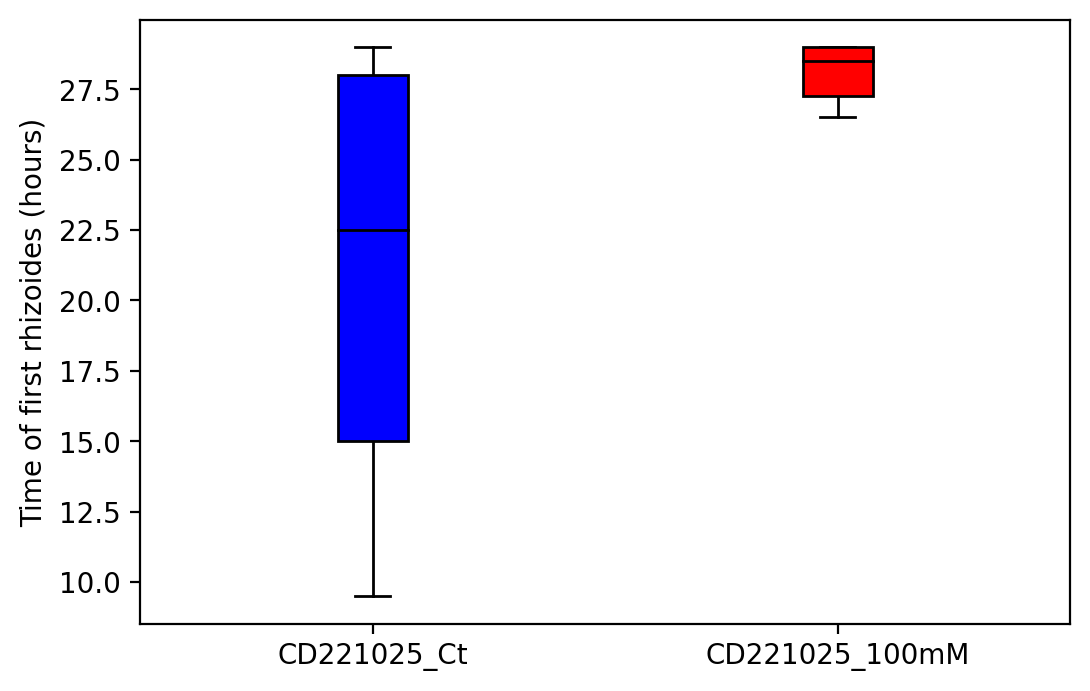

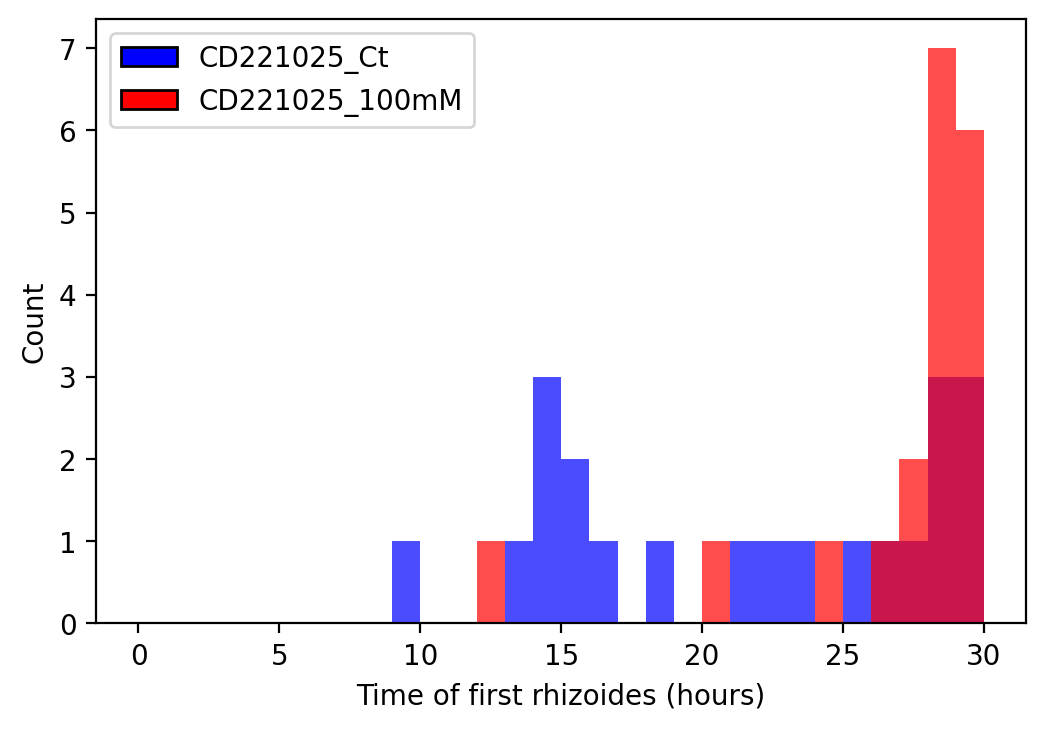

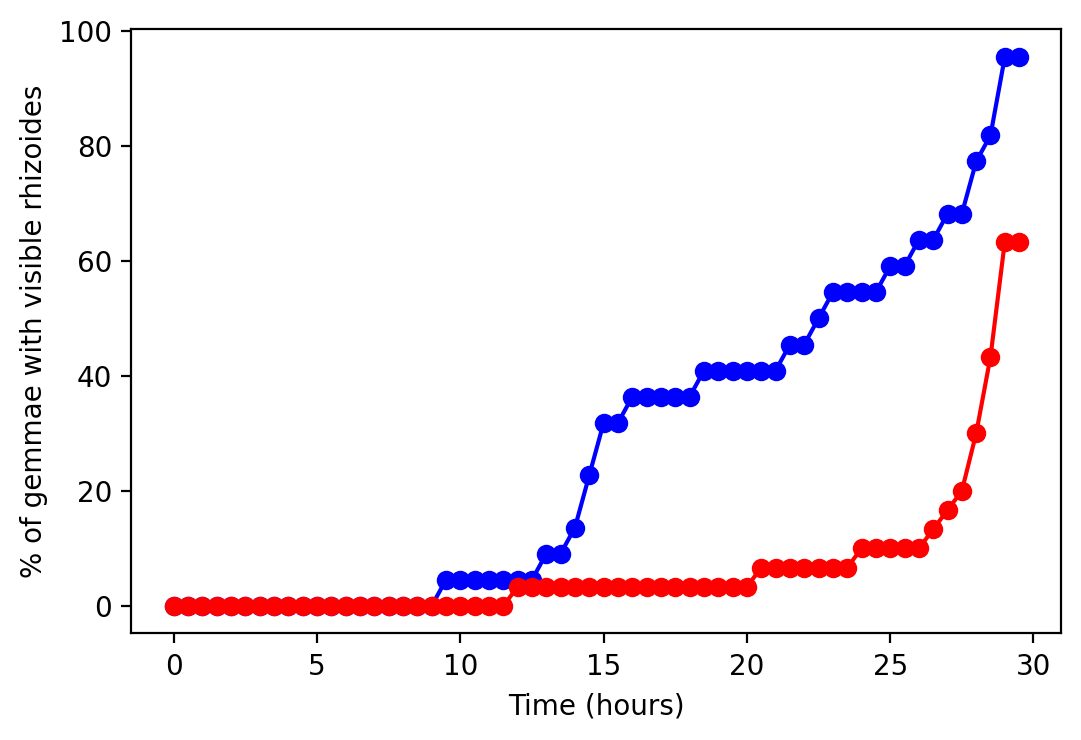

In [41]:
rhizoides([CD221025_Ct,CD221025_100mM],[GD221025_Ct,GD221025_100mM],
          [P221025_Ct,P221025_100mM],['b','r'],['CD221025_Ct','CD221025_100mM'])

In [ ]:
# rhizoides([CD220722_Ct,CD220722_ABA],
#           [GD220722_Ct,GD220722_ABA],
#           [P220722_Ct,P220722_ABA],['c','m'],['220722_Ct','220722_ABA'])

In [ ]:
rhizoides([CD220614_Ct,CD220722_Ct,CD220614_ABA,CD220722_ABA],
          [GD220614_Ct,GD220722_Ct,GD220614_ABA,GD220722_ABA],
          [P220614_Ct,P220722_Ct,P220614_ABA,P220722_ABA],['b','c','r','m'],
         ['220614_Ct','220722_Ct','220614_ABA','220722_ABA'])
